In [1]:
import pandas as pd
from tqdm import tqdm 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway

In [2]:
cd /mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC/AmpliconArchitect/DH_AAresults/

/mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC/AmpliconArchitect/DH_AAresults


In [3]:
df = pd.read_csv('CRCtx.allgene.txt',sep='\t')

In [4]:
ft = df['feature'].unique()

In [5]:
zscore = pd.read_csv('/mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC/RNA_Seq/Results/Geneexpression_zscorematrix.csv',sep='\t',index_col=0)

In [6]:
zscore=zscore.fillna(0)

In [7]:
df

,sample_name,amplicon_number,feature,gene,gene_cn,truncated,is_canonical_oncogene
0,CRCtx021,amplicon12,Complex non-cyclic_1,FAM242B,6.620864,NaN,False
1,CRCtx021,amplicon12,Complex non-cyclic_1,FRG1BP,5.933497,NaN,False
2,CRCtx021,amplicon12,Complex non-cyclic_1,FRG1CP,5.358745,NaN,False
3,CRCtx021,amplicon12,Complex non-cyclic_1,FRG1DP,5.923681,NaN,False
4,CRCtx021,amplicon12,Complex non-cyclic_1,FRG1EP,5.921619,NaN,False
...,...,...,...,...,...,...,...
686,CRCtx055,amplicon18,Linear amplification_1,DBET,16.955724,NaN,False
687,CRCtx055,amplicon18,Linear amplification_1,DUX4,16.955724,NaN,True
688,CRCtx055,amplicon22,Linear amplification_1,REXO1L2P,11.604354,NaN,False
689,CRCtx055,amplicon23,Linear amplification_1,LERFS,6.711175,5p,False


In [8]:
ge = {}
for i in ft:
    if i !='Complex non-cyclic_1':
        ge[i] = []
        df1 = df[df.feature==i]
        for m in df1.index:
            s = df1.loc[m,'sample_name']
            g = df1.loc[m,'gene']
            if g in zscore.index:
                ge[i].extend([zscore.loc[g,s]])


In [10]:
df2 = pd.read_csv('/mnt/Sdrive/SCI-BIO-BRSDriveCircularVision/Judith/Projects/CRC/eccDNA/Filt_CRCTumourTissue_Fullgenes2_WithGeneSymbol_only.bed',sep='\t',header=None)

In [11]:
df2 = df2[[0,1,2,4,12]]

In [12]:
df2.columns = ['chrom','start','end','sample','gene']

In [13]:
df.sample_name.unique()

array(['CRCtx021', 'CRCtx026', 'CRCtx027', 'CRCtx028', 'CRCtx029',
       'CRCtx033', 'CRCtx036', 'CRCtx040', 'CRCtx047', 'CRCtx053',
       'CRCtx054', 'CRCtx055'], dtype=object)

In [14]:
si = ['CRCtx021', 'CRCtx026', 'CRCtx027', 'CRCtx028', 'CRCtx029',
       'CRCtx033', 'CRCtx036', 'CRCtx040', 'CRCtx047', 'CRCtx053',
       'CRCtx054', 'CRCtx055']
sample_gene = []
for i in df2.index:
    ss = (df2.loc[i,'sample'].replace('-','x'))
    if ss in si:
        sample_gene.append('-'.join((ss,df2.loc[i,'gene'])))

In [16]:
ge['eccDNA'] = []
for m in sample_gene:
    s = m.split('-')[0]
    g = m.split('-')[1]
    if g in zscore.index:
        ge['eccDNA'].extend([zscore.loc[g,s]])


In [17]:
for i in ge:
    print (i, len(ge[i]))

Linear amplification_1 346
ecDNA_1 19
eccDNA 34850


In [18]:
dftest = pd.DataFrame.from_dict(ge, orient='index')

In [19]:
dftest.index.rename('Types', inplace=True)

In [20]:
dftest =dftest.reindex(['eccDNA','ecDNA_1','Linear amplification_1'])

In [21]:
stacked = dftest.stack().reset_index()
stacked.rename(columns={'level_1': 'Person', 0: 'Value'}, inplace=True)

In [22]:
dftest

,0,1,2,3,4,5,6,7,8,9,...,34840,34841,34842,34843,34844,34845,34846,34847,34848,34849
Types,,,,,,,,,,,,,,,,,,,,,
eccDNA,-1.224385,-1.148957,-0.957816,-1.097830,-1.465590,-1.532217,-0.788605,-0.555730,-0.429093,-0.789744,...,0.446384,-0.977777,0.363065,-0.423823,-0.336965,0.0,0.531045,-0.497966,-0.520075,-0.293972
ecDNA_1,0.125665,0.957130,0.486874,1.278161,4.898979,-0.711364,4.118667,1.553497,1.965093,-0.314492,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Linear amplification_1,0.408396,-0.966120,0.250011,0.194737,1.225607,-0.292585,-0.965246,-0.612223,-1.219944,-0.571981,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
cmap = ['#ef767a','#456990','#49beaa','#9A7085']

/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/judith/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

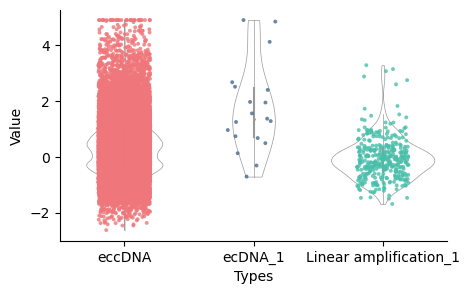

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
# plt.subplots_adjust(left=0.3, right=0.9, bottom=0.3, top=0.9)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax =sns.violinplot(data=stacked, x='Types', y='Value', color='white',alpha=0.5,cut=0,linewidth=0.5 )
ax = sns.stripplot(data= stacked, x='Types', y='Value',palette=cmap,alpha=0.8,jitter=0.2,size=2.8)
#plt.savefig('zscore_eccDNA_ecDNA_linearDNA_correctednumbers_allgenes.pdf')
plt.show()

In [ ]:
p_values = sp.posthoc_dunn([ge['Linear amplification_1'], ge['ecDNA_1'],ge['eccDNA']], p_adjust='holm')


In [ ]:
p_values

In [ ]:
print(p_values <0.05)

In [ ]:
dftest.loc['eccDNA'].max()

In [ ]:
dftest.loc['ecDNA_1'].max()

In [ ]:
ecDnage = df2['gene'].unique()